# Mobile Ad Campaign Targeting Optimization

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [2]:
# check the working directory used, should be location of this notebook
os.getcwd()

'/home/jovyan/git/DinoData'

In [3]:
# loading data
gaming = pd.read_pickle("data/gaming.pkl")

## Part I: Logistic regression
a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory and `click_yes` as the response variable

In [345]:
gaming["click_yes"] = (gaming["click"] == "yes").astype(int)

In [346]:
# Logistic regression via statsmodel (using the formula API)
lr_mod = smf.glm(
    formula="click_yes ~ time_fct + app + mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data=gaming.query("training =='train'"),
)
lr = lr_mod.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87458
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3946.1
Date:                Thu, 04 Feb 2021   Deviance:                       7892.1
Time:                        13:53:00   Pearson chi2:                 1.60e+05
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5282      0.197    -17.936      0.000      -3.914      -3.143
time_fct[T.2]         -0.4741      0.321     -1.478      0.139      -1.103       0.155
time_fct[T.3]         -0.3317      0.454     -0.730      0.466      -1.222       0.559
time_fct[T.4]        -23.5430    4.2e+04     -0.001      1.000   -8.24e+04    8.23e+04
time_fct[T.5]        -23.7205   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
time_fct[T.6]         -1.0516      1.021     -1.030      0.303      -3.053       0.950
time_fct[T.7]          0.1997      0.426      0.468      0.640      -0.636       1.036
time_fct[T.8]          0.0992      0.296      0.335      0.737      -0.481       0.679
time_fct[T.9]          0.0289      0.287      0.101      0.920      -0.534       0.592
time_fct[T.10]        -0.1866      0.295     -0.633      0.527      -0.764       0.391
time_fct[T.11]        -0.4515      0.276     -1.635      0.102      -0.993       0.090
time_fct[T.12]        -0.1351      0.280     -0.483      0.629      -0.683       0.413
time_fct[T.13]        -0.5281      0.290     -1.823      0.068      -1.096       0.040
time_fct[T.14]         0.0944      0.225      0.419      0.675      -0.347       0.536
time_fct[T.15]        -0.0140      0.225     -0.062      0.951      -0.455       0.428
time_fct[T.16]         0.0453      0.233      0.195      0.846      -0.411       0.502
time_fct[T.17]         0.0138      0.250      0.055      0.956      -0.477       0.504
time_fct[T.18]         0.0595      0.247      0.241      0.809      -0.424       0.543
time_fct[T.19]         0.2500      0.233      1.072      0.284      -0.207       0.707
time_fct[T.20]         0.2019      0.231      0.873      0.382      -0.251       0.655
time_fct[T.21]        -0.1422      0.244     -0.584      0.559      -0.620       0.335
time_fct[T.22]        -0.0302      0.238     -0.127      0.899      -0.496       0.436
time_fct[T.23]         0.0428      0.238      0.180      0.857      -0.424       0.509
time_fct[T.24]         0.0941      0.229      0.410      0.682      -0.356       0.544
app[T.app2]           -2.0905      0.229     -9.127      0.000      -2.539      -1.642
app[T.app3]           -1.6937      1.003     -1.689      0.091      -3.659       0.272
app[T.app4]           -0.9601      0.321     -2.988      0.003      -1.590      -0.330
app[T.app5]           -1.2644      1.005     -1.258      0.208      -3.234       0.705
app[T.app6]           -0.4288      0.175     -2.457      0.014      -0.771      -0.087
app[T.app7]           -0.5169      1.007     -0.513      0.608      -2.491       1.458
app[T.app8]          -24.3740   7.17e+04     -0.000      1.000   -1.41e+05     1.4e+05
app[T.app9]           -0.2899      0.236     -1.227      0.220      -0.753       0.173
app[T.app10]         -23.8906   6.71e+

###  b. Summarize and interpret the logistic regression results

Which of these explanatory variables are statistically significant? Which variables seem to be most “important”? Make sure your model evaluation includes (1) an interpretation of the odds-ratios estimated for the explanatory variables mobile_os, impua, clua, and ctrua and (2) an evaluation of the model as a whole.


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 159784.981 df(76), p.value < 0.001 
Nr obs: 87,535



,index,OR,OR%,2.5%,97.5%
1,time_fct[T.2],0.622,-37.757%,0.332,1.167
2,time_fct[T.3],0.718,-28.227%,0.295,1.749
3,time_fct[T.4],0.000,-100.0%,0.000,inf
4,time_fct[T.5],0.000,-100.0%,0.000,inf
5,time_fct[T.6],0.349,-65.061%,0.047,2.586
...,...,...,...,...,...
72,mobile_os[T.ios],0.450,-55.001%,0.387,0.523
73,mobile_os[T.other],0.719,-28.097%,0.502,1.029
74,impua,0.979,-2.129%,0.975,0.982
75,clua,1.295,29.499%,1.156,1.451


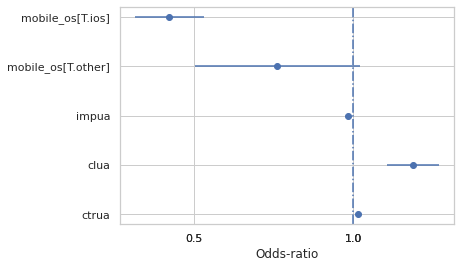

In [347]:
# discuss and add any code need to calculate additional statistics you may need
rsm.or_plot(lr, excl=["time_fct", "app"])
rsm.model_fit(lr)
rsm.or_ci(lr)

The explanatory variables clua and ctrua have a positive effect on click_yes, while the variables impua and mobile_os have a negative effect on click_yes. Clua with a positive factor of 1.295, ctrua with a positive factor of about 1.022 and impua with a negative factor of about .979, but very close to 1. Mobile_os for ios is lower than other because it is more specific to one device. This is logical because clua is the number of past clicks in for a user across all apps, while ctrua is the click through rate x100 across all apps for the user which would have a positive correlation to click_yes. Impua would have a slight negative effect on click_yes with clua and ctrua in the model because it is the number of past impressions the user has seen in total which carries a cost and does not always always convert into a click. Overall the model is not very good because of the extremely low R-squared and low significance in many of the explanatory variables. In addition, the high AIC and chi-squared indicated that the model is not a good fit.

c. Estimate a logistic regression model with `click_yes` as the response variable and `imppat`, `clpat`, and
`ctrpat` as the only explanatory variable. Make sure to standardize the explanatory variables before estimation (see example code below). What is the interpretation of the standardized odds-ratios for the explanatory variables?

In [348]:
# list all numeric variables in the data
is_num = [
    "time",
    "impup",
    "clup",
    "ctrup",
    "impua",
    "clua",
    "ctrua",
    "imput",
    "clut",
    "ctrut",
    "imppat",
    "clpat",
    "ctrpat",
]

In [349]:
# scale by (x - mean(x)) / (2 * sd(x))
scaler = preprocessing.StandardScaler()
sf = scaler.fit(gaming.query("training == 'train'")[is_num])
sf.scale_ = sf.scale_ * 2
tz_std = gaming.copy()
tz_std[is_num] = sf.transform(tz_std[is_num])

In [350]:
X_colnames = gaming.loc[[0], "imppat":"ctrpat"].columns
scaler = preprocessing.StandardScaler()
sf = scaler.fit(gaming.query("training == 'train'")[X_colnames])
sf.scale_ = sf.scale_ * 2
tz_std = gaming.copy()
tz_std[X_colnames] = sf.transform(tz_std[X_colnames])

In [351]:
lr_mod = smf.glm(
    formula="click_yes ~ imppat + clpat + ctrpat",
    family=Binomial(link=logit()),
    data=tz_std.query("training =='train'"),
)
lr = lr_mod.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87531
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4273.1
Date:                Thu, 04 Feb 2021   Deviance:                       8546.2
Time:                        13:53:03   Pearson chi2:                 8.16e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9146      0.043   -114.228      0.000      -4.999      -4.830
imppat        -2.0099      0.419     -4.802      0.000      -2.830      -1.189
clpat          2.4586      0.430      5.713      0.000       1.615       3.302
ctrpat         0.7054      0.051     13.933      0.000       0.606       0.805
==============================================================================
"""

,index,OR,OR%,2.5%,97.5%
1,imppat,0.134,-86.6%,0.059,0.304
2,clpat,11.688,1068.831%,5.028,27.170
3,ctrpat,2.025,102.463%,1.833,2.236


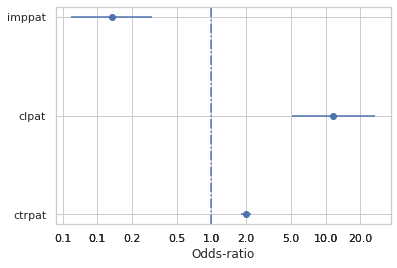

In [352]:
rsm.or_plot(lr)
rsm.or_ci(lr)

The explanatory variables clpat and ctrpat have a positive effect on click_yes, while imppat has a negative effect on click_yes. Clpat with a positive factor of about 10, ctrpat with a positive factor of about 2 and imppat with a negative factor of about .15. This is logical because clpat is the number of of past clicks in the app in the hour, while ctrpat is the click through rate x100 in the app in the hour which would have a positive correlation to click_yes. Imppat would have a negative effect on click_yes because it is the number of past impressions shown of the app in the hour which carries a cost and does not always convert into a click. Overall the model is not very good because of the extremely low R-squared and low significance in many of the explanatory variables. In addition, the high AIC and chi-squared indicated that the model is not a good fit.

d. Some of the variables in the dataset are highly correlated with each other. In particular, imppat
and clpat have a positive correlation of 0.97. Discuss the implications of this (very) high level of
collinearity and also different approaches to deal with it. What are the implications for the model and
the interpretation of the estimated (standardized) coefficients? As part of your answer, discuss the
change in the estimated (standardized) odd-ratio for imppat when you remove clpat from the model.

In [353]:
# insert your answer here
# hint: review the help for the `vif` function in the pyrsm function
rsm.vif(lr_mod)

,variable,vif,Rsq
0,clpat,26.242,0.962
1,imppat,23.467,0.957
2,ctrpat,1.668,0.400


In [354]:
lr_mod = smf.glm(
    formula="click_yes ~ imppat + ctrpat",
    family=Binomial(link=logit()),
    data=tz_std.query("training =='train'"),
)
lr = lr_mod.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87532
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4290.9
Date:                Thu, 04 Feb 2021   Deviance:                       8581.8
Time:                        13:53:11   Pearson chi2:                 8.16e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8594      0.040   -121.262      0.000      -4.938      -4.781
imppat         0.3451      0.063      5.460      0.000       0.221       0.469
ctrpat         0.8090      0.044     18.422      0.000       0.723       0.895
==============================================================================
"""

,index,OR,OR%,2.5%,97.5%
1,imppat,1.412,41.208%,1.248,1.598
2,ctrpat,2.246,124.559%,2.060,2.447


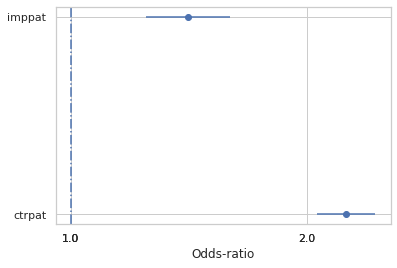

In [355]:
rsm.or_plot(lr)
rsm.or_ci(lr)

Once clpat is removed from the model the correlation between clpat and imppat goes away, demonstrated by the increase in the odds ratio for imppat. Imppat now has a higher significance in the model and a positive effect on click_yes of a factor of 1.2. This is because impressions lead to clicks so without clicks as an explanatory variable, impressions have a higher significance in the model since they were highly correlated before.

e. Estimate another logistic regression model with `click_yes` as the response variable and `time_fct`,
`app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the odds ratios for `imppat`,
`clpat`, and `ctrpat` different in the two models? Please be specific and investigate beyond simply
stating the statistical problem.

In [356]:
# insert your answer here
scaler = preprocessing.StandardScaler()
sf = scaler.fit(gaming.query("training == 'train'")[is_num])
sf.scale_ = sf.scale_ * 2
tz_std = gaming.copy()
tz_std[is_num] = sf.transform(tz_std[is_num])

In [357]:
lr_mod = smf.glm(
    formula="click_yes ~ time_fct + app + imppat + clpat + ctrpat",
    family=Binomial(link=logit()),
    data=tz_std.query("training =='train'"),
)
lr = lr_mod.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87460
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4180.6
Date:                Thu, 04 Feb 2021   Deviance:                       8361.3
Time:                        13:53:28   Pearson chi2:                 8.39e+04
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.3871      0.206    -21.281      0.000      -4.791      -3.983
time_fct[T.2]     -0.5316      0.323     -1.644      0.100      -1.166       0.102
time_fct[T.3]     -0.3669      0.461     -0.795      0.426      -1.271       0.537
time_fct[T.4]    -23.8342   4.39e+04     -0.001      1.000   -8.61e+04     8.6e+04
time_fct[T.5]    -23.8601   5.72e+04     -0.000      1.000   -1.12e+05    1.12e+05
time_fct[T.6]     -1.0252      1.027     -0.999      0.318      -3.037       0.987
time_fct[T.7]      0.1986      0.438      0.453      0.650      -0.660       1.057
time_fct[T.8]      0.1270      0.309      0.411      0.681      -0.479       0.733
time_fct[T.9]      0.0606      0.299      0.203      0.839      -0.525       0.646
time_fct[T.10]    -0.1703      0.303     -0.561      0.575      -0.765       0.424
time_fct[T.11]    -0.4512      0.288     -1.565      0.118      -1.016       0.114
time_fct[T.12]    -0.1810      0.292     -0.620      0.535      -0.753       0.391
time_fct[T.13]    -0.6261      0.306     -2.047      0.041      -1.226      -0.026
time_fct[T.14]    -0.0177      0.257     -0.069      0.945      -0.522       0.487
time_fct[T.15]    -0.1738      0.272     -0.639      0.523      -0.707       0.359
time_fct[T.16]    -0.1346      0.279     -0.483      0.629      -0.681       0.412
time_fct[T.17]    -0.1458      0.296     -0.493      0.622      -0.725       0.434
time_fct[T.18]    -0.0595      0.286     -0.208      0.835      -0.619       0.500
time_fct[T.19]     0.1637      0.251      0.651      0.515      -0.329       0.656
time_fct[T.20]     0.1723      0.247      0.698      0.485      -0.311       0.656
time_fct[T.21]    -0.2455      0.261     -0.942      0.346      -0.756       0.265
time_fct[T.22]    -0.0691      0.259     -0.267      0.789      -0.576       0.438
time_fct[T.23]    -0.0066      0.268     -0.025      0.980      -0.533       0.520
time_fct[T.24]     0.1255      0.258      0.486      0.627      -0.380       0.631
app[T.app2]       -1.9965      0.351     -5.681      0.000      -2.685      -1.308
app[T.app3]       -1.6746      1.016     -1.649      0.099      -3.665       0.316
app[T.app4]       -0.7193      0.359     -2.004      0.045      -1.423      -0.016
app[T.app5]       -0.8832      1.011     -0.874      0.382      -2.864       1.098
app[T.app6]        0.0073      0.216      0.034      0.973      -0.416       0.431
app[T.app7]       -0.3460      1.019     -0.340      0.734      -2.343       1.651
app[T.app8]      -24.1102   7.27e+04     -0.000      1.000   -1.43e+05    1.42e+05
app[T.app9]       -0.0672      0.271     -0.248      0.804      -0.599       0.464
app[T.app10]     -24.0211   7.56e+04     -0.000      1.000   -1.48e+05    1.48e+05
app[T.app11]       0.3115      0.752      0.414      0.679      -1.163       1.786
app[T.app12]

,index,OR,OR%,2.5%,97.5%
1,time_fct[T.2],0.588,-41.235%,0.312,1.108
2,time_fct[T.3],0.693,-30.714%,0.280,1.711
3,time_fct[T.4],0.000,-100.0%,0.000,inf
4,time_fct[T.5],0.000,-100.0%,0.000,inf
5,time_fct[T.6],0.359,-64.129%,0.048,2.683
...,...,...,...,...,...
70,app[T.app48],0.000,-100.0%,0.000,inf
71,app[T.app49],0.259,-74.054%,0.035,1.911
72,imppat,0.365,-63.498%,0.064,2.092
73,clpat,2.934,193.37%,0.457,18.817


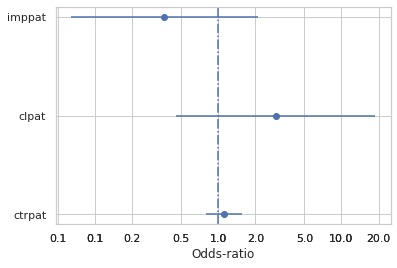

In [358]:
rsm.or_plot(lr, excl=["time_fct", "app"])
rsm.or_ci(lr)

The odds ratios are different in the two models because the explanatory variables time_fct and app have very high negative effects on click_yes, sometimes by even a factor of 0. This skews the odds ratio in that imppat, clpat, and ctrpat move closer to the factor of 1 line, yet clpat and ctrpat still have a positive effect on click_yes, while imppat still have a negative effect.

## Part II: Decile Analysis of Logistic Regression Results
### a. Create deciles

a. Assign each impression to a decile based on the predicted probability of click through. Create a new
variable dec_logit that captures this information. Note: The first decile should have the highest
average click-through rate. If not, make sure to “reverse” the decile numbers (i.e., 10 becomes 1, 9
becomes 2, etc.). Please use the xtile function from the pyrsm package to create the deciles

In [359]:
# insert your answer here
lr_mod = smf.glm(
    formula="click_yes ~ time_fct + app + mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data=gaming.query("training =='train'"),
)
lr = lr_mod.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87458
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3946.1
Date:                Thu, 04 Feb 2021   Deviance:                       7892.1
Time:                        13:53:40   Pearson chi2:                 1.60e+05
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5282      0.197    -17.936      0.000      -3.914      -3.143
time_fct[T.2]         -0.4741      0.321     -1.478      0.139      -1.103       0.155
time_fct[T.3]         -0.3317      0.454     -0.730      0.466      -1.222       0.559
time_fct[T.4]        -23.5430    4.2e+04     -0.001      1.000   -8.24e+04    8.23e+04
time_fct[T.5]        -23.7205   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
time_fct[T.6]         -1.0516      1.021     -1.030      0.303      -3.053       0.950
time_fct[T.7]          0.1997      0.426      0.468      0.640      -0.636       1.036
time_fct[T.8]          0.0992      0.296      0.335      0.737      -0.481       0.679
time_fct[T.9]          0.0289      0.287      0.101      0.920      -0.534       0.592
time_fct[T.10]        -0.1866      0.295     -0.633      0.527      -0.764       0.391
time_fct[T.11]        -0.4515      0.276     -1.635      0.102      -0.993       0.090
time_fct[T.12]        -0.1351      0.280     -0.483      0.629      -0.683       0.413
time_fct[T.13]        -0.5281      0.290     -1.823      0.068      -1.096       0.040
time_fct[T.14]         0.0944      0.225      0.419      0.675      -0.347       0.536
time_fct[T.15]        -0.0140      0.225     -0.062      0.951      -0.455       0.428
time_fct[T.16]         0.0453      0.233      0.195      0.846      -0.411       0.502
time_fct[T.17]         0.0138      0.250      0.055      0.956      -0.477       0.504
time_fct[T.18]         0.0595      0.247      0.241      0.809      -0.424       0.543
time_fct[T.19]         0.2500      0.233      1.072      0.284      -0.207       0.707
time_fct[T.20]         0.2019      0.231      0.873      0.382      -0.251       0.655
time_fct[T.21]        -0.1422      0.244     -0.584      0.559      -0.620       0.335
time_fct[T.22]        -0.0302      0.238     -0.127      0.899      -0.496       0.436
time_fct[T.23]         0.0428      0.238      0.180      0.857      -0.424       0.509
time_fct[T.24]         0.0941      0.229      0.410      0.682      -0.356       0.544
app[T.app2]           -2.0905      0.229     -9.127      0.000      -2.539      -1.642
app[T.app3]           -1.6937      1.003     -1.689      0.091      -3.659       0.272
app[T.app4]           -0.9601      0.321     -2.988      0.003      -1.590      -0.330
app[T.app5]           -1.2644      1.005     -1.258      0.208      -3.234       0.705
app[T.app6]           -0.4288      0.175     -2.457      0.014      -0.771      -0.087
app[T.app7]           -0.5169      1.007     -0.513      0.608      -2.491       1.458
app[T.app8]          -24.3740   7.17e+04     -0.000      1.000   -1.41e+05     1.4e+05
app[T.app9]           -0.2899      0.236     -1.227      0.220      -0.753       0.173
app[T.app10]         -23.8906   6.71e+

In [360]:
test_df = gaming.query("training =='test'").copy()
test_df["logit_predict"] = lr.predict(test_df)
test_df["dec_logit"] = rsm.xtile(test_df["logit_predict"], 10, rev=True)

b. Create a bar chart of click-through rates per decile (i.e., use dec_logit as the x-variable and ‘click_yes
as the y-variable). Note that the “click through rate” is not the same as the “predicted probability of
click.” The click through rate captures the proportion of impressions in a given group (e.g., in a decile)
that actually resulted in a click.

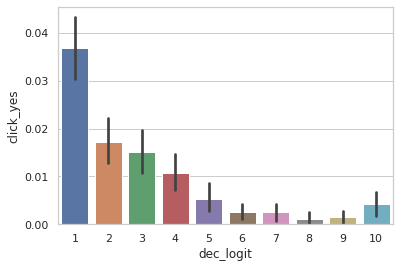

In [361]:
# insert your answer here
sns.set_theme(style="whitegrid")
sns.barplot(x="dec_logit", y="click_yes", data=test_df)
plt.show()

c. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per
decile and save this information to a dataframe. Use the name dec_df_logit for the new data frame.

In [362]:
# insert your answer here
x = [1] * 27953
dec_data = {
    "dec_logit": test_df["dec_logit"],
    "imp": [1] * 27953,
    "click": test_df["click_yes"],
}
dec_df_logit = pd.DataFrame(data=dec_data)
dec_df_logit = dec_df_logit.set_index("dec_logit")

dec_df_logit = dec_df_logit.groupby("dec_logit").sum()
ctr = dec_df_logit["click"] / dec_df_logit["imp"]
dec_df_logit["ctr"] = ctr
print(dec_df_logit)
# print(dec_df_logit)

            imp  click       ctr
dec_logit                       
1          2796    103  0.036838
2          2793     48  0.017186
3          2788     42  0.015065
4          2796     30  0.010730
5          2802     15  0.005353
6          2796      7  0.002504
7          2794      7  0.002505
8          2796      3  0.001073
9          2796      4  0.001431
10         2796     12  0.004292


## Part III: Lift and Gains

a. Use the dataframe you created in II.c above to generate a table with lift and cumulative lift numbers
for each decile

In [363]:
# insert your answer here
overall_ctr = dec_df_logit["click"].sum() / dec_df_logit["imp"].sum()
dec_df_logit["lift"] = dec_df_logit["ctr"] / overall_ctr
dec_df_logit["cum_ctr"] = dec_df_logit["click"].cumsum() / dec_df_logit["imp"].cumsum()
dec_df_logit["cum_lift"] = dec_df_logit["cum_ctr"] / overall_ctr
dec_df_logit["cum_prop"] = (dec_df_logit["imp"] / dec_df_logit["imp"].sum()).cumsum()
print(dec_df_logit)

            imp  click       ctr      lift   cum_ctr  cum_lift  cum_prop
dec_logit                                                               
1          2796    103  0.036838  3.799786  0.036838  3.799786  0.100025
2          2793     48  0.017186  1.772676  0.027017  2.786775  0.199943
3          2788     42  0.015065  1.553873  0.023039  2.376446  0.299682
4          2796     30  0.010730  1.106734  0.019959  2.058705  0.399707
5          2802     15  0.005353  0.552182  0.017030  1.756646  0.499946
6          2796      7  0.002504  0.258238  0.014609  1.506837  0.599971
7          2794      7  0.002505  0.258423  0.012880  1.328556  0.699925
8          2796      3  0.001073  0.110673  0.011404  1.176273  0.799950
9          2796      4  0.001431  0.147565  0.010295  1.061940  0.899975
10         2796     12  0.004292  0.442694  0.009695  1.000000  1.000000


b. Use seaborn or matplotlib to create a chart showing the cumulative lift per decile. Put cumulative
lift on the Y-axis and cumulative proportion of impressions on the X-axis

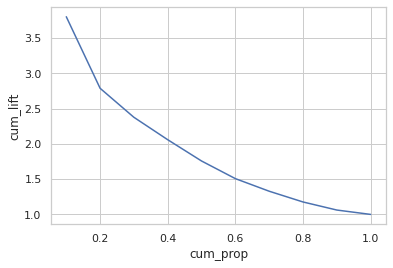

In [364]:
# insert your answer here
sns.set_theme(style="whitegrid")
sns.lineplot(x="cum_prop", y="cum_lift", data=dec_df_logit)
plt.show()

c. Use the data frame you created in II.c above to generate a table with gains and cumulative gains
numbers for each decile

In [365]:
# insert your answer here
dec_df_logit["cum_click"] = dec_df_logit["click"].cumsum()
dec_df_logit["gains"] = dec_df_logit["click"] / dec_df_logit["click"].sum()
dec_df_logit["cum_gains"] = dec_df_logit["gains"].cumsum()
print(dec_df_logit)

            imp  click       ctr      lift   cum_ctr  cum_lift  cum_prop  \
dec_logit                                                                  
1          2796    103  0.036838  3.799786  0.036838  3.799786  0.100025   
2          2793     48  0.017186  1.772676  0.027017  2.786775  0.199943   
3          2788     42  0.015065  1.553873  0.023039  2.376446  0.299682   
4          2796     30  0.010730  1.106734  0.019959  2.058705  0.399707   
5          2802     15  0.005353  0.552182  0.017030  1.756646  0.499946   
6          2796      7  0.002504  0.258238  0.014609  1.506837  0.599971   
7          2794      7  0.002505  0.258423  0.012880  1.328556  0.699925   
8          2796      3  0.001073  0.110673  0.011404  1.176273  0.799950   
9          2796      4  0.001431  0.147565  0.010295  1.061940  0.899975   
10         2796     12  0.004292  0.442694  0.009695  1.000000  1.000000   

           cum_click     gains  cum_gains  
dec_logit                                  

d. Use seaborn or matplotlib to create a chart showing the cumulative gains per decile along with a
(diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and
cumulative proportion of impressions on the X-axis

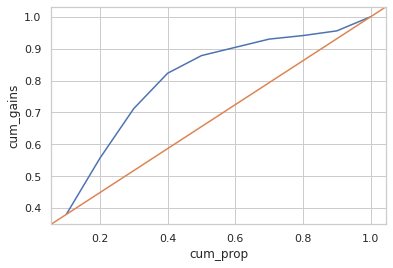

In [368]:
# insert your answer here
sns.set_theme(style="whitegrid")
g = sns.lineplot(x="cum_prop", y="cum_gains", data=dec_df_logit)
g.plot([0, 1], [0, 1], transform=g.transAxes)
plt.show()

# Part IV: Confusion matrix

a. Create a “confusion matrix” based on the predictions from the logistic regression model you estimated
above for I.a. Again, use only data from the test set here (i.e., “training == ‘test’ ”). Use the
financial assumptions mentioned above, and repeated in section V below, to determine an appropriate
cut-off (i.e., break-even). Calculate “accuracy” based on the confusion matrix you created (see http:
//lab.rady.ucsd.edu/sawtooth/RBusinessAnalytics/logit_models.html for an example using R)
Note: Do not use any specialized packages to construct the confusion matrix

In [367]:
# insert your answer here
lr_mod1 = smf.glm(
    formula="click_yes ~ time_fct + app + mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data=gaming.query("training =='train'"),
)
lr1 = lr_mod1.fit()

In [341]:
test_df1 = gaming.query("training =='test'").copy()
test_df1["logit_predict"] = lr1.predict(test_df1)

In [342]:
cost = 10 / 1000
conversion = 0.05
clv = 25
threshold1 = cost / (conversion * clv)
threshold2 = 0.5

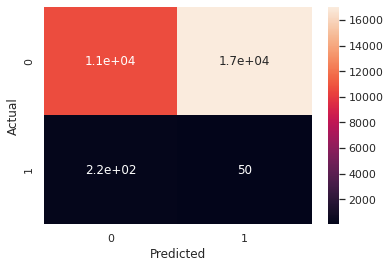

In [343]:
data1 = {"y_Actual": test_df1["click_yes"], "y_Predicted": test_df1["logit_predict"]}
df1 = pd.DataFrame(data1, columns=["y_Actual", "y_Predicted"])
df1["y_Predicted"] = (df1["y_Predicted"] >= threshold1).astype(int)
df1["y_Predicted"] = (df1["y_Predicted"] < threshold1).astype(int)
confusion_matrix1 = pd.crosstab(
    df1["y_Actual"], df1["y_Predicted"], rownames=["Actual"], colnames=["Predicted"]
)
sns.heatmap(confusion_matrix1, annot=True)
plt.show()

In [344]:
accuracy1 = (
    confusion_matrix1.iloc[1, 1] + confusion_matrix1.iloc[0, 0]
) / confusion_matrix1.sum().sum()
print(accuracy1)

0.38317890745179406


b. Calculate a confusion matrix based on predictions from a logistic regression with click_yes as the
response variable and rnd as the only explanatory variable. As before, the model should be estimated
on training sample (i.e., “training == ‘train’ ”). Generate predictions for all rows in the data and create
the confusion matrix based only on the test set (i.e., “training == ‘test’ ”). Calculate “accuracy” based
on the confusion matrix you created.

In [270]:
# insert your answer here
lr_mod2 = smf.glm(
    formula="click_yes ~ rnd",
    family=Binomial(link=logit()),
    data=gaming.query("training =='train'"),
)
lr2 = lr_mod2.fit()

In [271]:
test_df2 = gaming.query("training =='test'").copy()
test_df2["logit_predict"] = lr2.predict(test_df2)

In [272]:
cost = 10 / 1000
conversion = 0.05
clv = 25
threshold1 = cost / (conversion * clv)

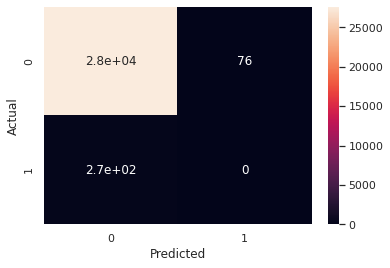

In [302]:
data2 = {"y_Actual": test_df2["click_yes"], "y_Predicted": test_df2["logit_predict"]}
df2 = pd.DataFrame(data2, columns=["y_Actual", "y_Predicted"])
df2["y_Predicted"] = (df2["y_Predicted"] >= threshold1).astype(int)
df2["y_Predicted"] = (df2["y_Predicted"] < threshold1).astype(int)
confusion_matrix2 = pd.crosstab(
    df2["y_Actual"], df2["y_Predicted"], rownames=["Actual"], colnames=["Predicted"]
)
sns.heatmap(confusion_matrix2, annot=True)
plt.show()

In [275]:
accuracy2 = (
    confusion_matrix2.iloc[1, 1] + confusion_matrix2.iloc[0, 0]
) / confusion_matrix2.sum().sum()

0.9875863055843738


c. Discuss the similarities and differences between the two confusion matrices. Which model is best, based
on the confusion matrix? Provide support for your conclusions.
4

The similaritis between the two matrices are that the False Negatives and False Positves are the highest numbers with False Negative being the highest and True Positive and True Negative being the lower numbers, with True Positive being the lowest. The differences are that the second confusion matrix is only calculated with the RnD explanatory variable and yields no True Positives. This would seem to suggest that the accuracy of the second matrix would be lower. However, the accuracy of the second matrix is much higher, almost 99%, with the first matrix accuracy being about 38%. This suggests that the accuracy score does not take many factors such as less explanatory variables into account and is not that accurate.

d. Recalculate the confusion matrices from IV.a and IV.b using 0.5 as the cutoff. Based on these new
matrices, discuss again the similarities and differences. Which model is best based on the confusion
matrix? Provide support for your conclusions.

##### IV.a

Predicted      1
Actual          
0          27682
1            271


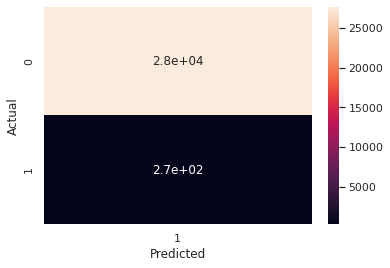

In [282]:
data1 = {"y_Actual": test_df1["click_yes"], "y_Predicted": test_df1["logit_predict"]}
df3 = pd.DataFrame(data1, columns=["y_Actual", "y_Predicted"])
df3["y_Predicted"] = (df3["y_Predicted"] >= threshold2).astype(int)
df3["y_Predicted"] = (df3["y_Predicted"] < threshold2).astype(int)
confusion_matrix3 = pd.crosstab(
    df3["y_Actual"], df3["y_Predicted"], rownames=["Actual"], colnames=["Predicted"]
)
sns.heatmap(confusion_matrix3, annot=True)
plt.show()

##### IV.b

Predicted      1
Actual          
0          27682
1            271


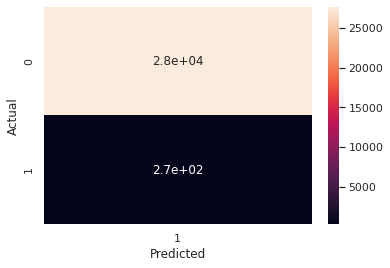

In [283]:
data2 = {"y_Actual": test_df2["click_yes"], "y_Predicted": test_df2["logit_predict"]}
df4 = pd.DataFrame(data2, columns=["y_Actual", "y_Predicted"])
df4["y_Predicted"] = (df4["y_Predicted"] >= threshold2).astype(int)
df4["y_Predicted"] = (df4["y_Predicted"] < threshold2).astype(int)
confusion_matrix4 = pd.crosstab(
    df4["y_Actual"], df4["y_Predicted"], rownames=["Actual"], colnames=["Predicted"]
)
sns.heatmap(confusion_matrix4, annot=True)
plt.show()

Based on the two matrices, calculated with a break-even of 0.5, the results are exactly the same, but there is no negatives predicted for either. this is because the cut off is too high so the model has only predicted that the user will click for every impression. Based on the confusion matrix, the first model is the best, because it has more explanatory variables to provide more realistic predictions.

## Part V: Profitability Analysis

a. Create a new variable target_logit that is True if the predicted click-through probability is greater
than the break-even response rate you calculated in IV.a and FALSE otherwise

In [285]:
# insert your answer here
profit_df = gaming.query("training =='test'").copy()
profit_df["logit_predict"] = lr1.predict(profit_df)

In [289]:
profit_df["target_logit"] = profit_df["logit_predict"].map(lambda x: x >= threshold1)

       training     inum click  time time_fct    app mobile_os        id  \
87535      test  I300002    no    21       21   app1   android  id466983   
87536      test  I300006    no     3        3  app40       ios  id946375   
87537      test  I300012    no     5        5  app12   android  id479295   
87538      test  I300015    no    10       10   app1   android   id83284   
87539      test  I300016    no    14       14   app1       ios  id359434   
...         ...      ...   ...   ...      ...    ...       ...       ...   
115483     test  I399982    no    21       21   app2       ios  id847352   
115484     test  I399986    no    17       17  app14   android  id457437   
115485     test  I399991    no    23       23   app1   android  id792352   
115486     test  I399992    no    20       20   app6   android  id115678   
115487     test  I399994    no    18       18   app1       ios  id705546   

        impup  clup  ...  clut     ctrut  imppat  clpat    ctrpat       rnd  \
87535   

b. For the test set (i.e, “training == ‘test’ ”), what is the expected profit (in dollars) and the expected
return on marketing expenditures (ROME) if the company used (1) no targeting, (2) purchased the data from
Vneta and used the logistic regression from I.a for targeting, or (3) used Vneta’s data science consulting
services? You can use the click_vneta variable to create a target_vneta variable and calculate the
expected profit and the expected return on marketing expenditures

Note: To estimate the performance implications of “no targeting” approach use the predictions
from the model you estimated in IV.b

In [294]:
# insert your answer here
profit_df["target_vneta"] = profit_df["click_vneta"].map(lambda x: x >= threshold1)
profit_df["logit_predict_rnd"] = test_df2["logit_predict"]
profit_df["target_logit_rnd"] = profit_df["logit_predict_rnd"].map(lambda x: x >= 0)

In [309]:
nr_player = 27953
cost = 10 / 1000
conversion = 0.05
clv = 25
data_cost = 50000
vneta_service = 150000
threshold1 = cost / (conversion * clv)
impressions = 20000000

In [300]:
no_targeting = profit_df["target_logit_rnd"].sum()
targeting = profit_df["target_logit"].sum()
vneta = profit_df["target_vneta"].sum()

In [305]:
notarget_profit = ((no_targeting * conversion) * clv) - (nr_player * cost)
notarget_ROME = notarget_profit / (nr_player * cost)
print(notarget_profit)
print(notarget_ROME)

34661.72
123.99999999999999


In [308]:
target_profit = ((targeting * conversion) * clv) - (targeting * cost)
target_ROME = target_profit / (targeting * cost)
print(target_profit)
print(target_ROME)

13493.68
124.0


In [307]:
vneta_profit = ((vneta * conversion) * clv) - (vneta * cost)
vneta_ROME = vneta_profit / (vneta * cost)
print(vneta_profit)
print(vneta_ROME)

6040.04
124.0


c. Predict the profit and ROME implications for each of the 3 options if TZ purchases 20-million impression
for the upcoming ad campaign? Use the results from (b) above to project the performance
implications

Note: The currently available data (+ the click_vneta prediction) are free as part of the partnership
with Vneta. You should assume, however, that the total cost of the
data would be (50K) and that the

In [322]:
# insert your answer here
notarget_profit2 = (((no_targeting * nr_player / impressions) * conversion) * clv) - (
    impressions * cost
)
notarget_ROME2 = notarget_profit2 / (nr_player * cost)
print(notarget_profit2)
print(notarget_ROME2)

-199951.1643619375
-715.3120035843648


In [329]:
target_profit2 = (
    (((targeting * nr_player / impressions) * conversion) * clv)
    - ((targeting * nr_player / impressions) * cost)
    - 50000
)
target_ROME2 = target_profit2 / (targeting * cost)
print(target_profit2)
print(target_ROME2)

-49981.140558148
-459.3010527306377


In [330]:
vneta_profit2 = (
    (((vneta * nr_player / impressions) * conversion) * clv)
    - ((vneta * nr_player / impressions) * cost)
    - 200000
)
vneta_ROME2 = vneta_profit2 / (vneta * cost)
print(vneta_profit2)
print(vneta_ROME2)

-199991.558138094
-4105.759764690905


## Part VI: Model comparison

a. The calculations in V.a through V.c above assume that the predicted probabilities are estimated
without error. Calculate the confidence interval for the predictions from the logistic regression model
shown below. Now redo the calculations from V.a through V.c, for this, adjusting for estimation errors.
How do your results change?

Create a variable `target_logit_lb` that is `True` if the predicted click-through probability is greater than the break-even response rate and `False` otherwise. Add the columns you need from the "pred" data frame to your data set

In [336]:
lr_mod = smf.glm(
    formula="click_yes ~ time_fct + app + mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data=gaming.query("training =='train'"),
)
lr = lr_mod.fit()
lr.summary()
pred = rsm.predict_ci(lr, gaming.query("training =='test'"), alpha=0.1)

In [337]:
# insert your answer here
pred["target_logit_lb"] = pred["prediction"].map(lambda x: x >= threshold1)

In [338]:
final_df = pd.concat([profit_df, pred], axis=1, join="inner")

b. You have now estimated 3 different models and also have the predictions from Vneta (see prediction
labels below). Compare the models using (1) profit calculations as in V.a through V.c and (2) a gains
chart. Discuss which of these 5 models you would recommend to put into production and why.

Based on the profit calculations and gains chart I would recommend that the final model be put into production, using the targeting approach with the data purchased from Vneta. This model yields the highest ROME. While the Vneta service is the most accurate the cost makes the gains lower than the targeting method. The targeting method is not even close because the profit and ROME are negative. 